## **Team 52**


*   Anghelo Daniel Pérez Martínez (A01795323)
*   Luis Daniel Ortega Muñoz (A01795197)
*   Emil Khaleb Palomino Bruzzón (A00826811)
*   José de Jesús Peña Rodríguez (A01794940)
*   Gerardo Miguel Pérez Solis (A01795599)

# TC 5033
## Deep Learning
## Transfer Learning

<br>

#### Activity 2c: Exploring Transfer Learning with CIFAR-10
<br>

- Objective:

    In this activity, you'll study the concept of Transfer Learning, a powerful technique to improve the performance of your models by leveraging pre-trained architectures. The provided notebook offers a complete solution using a specific pre-trained model on the CIFAR-10 dataset. Your task is to extend this by trying out two other pre-trained models.
    
- Instructions:

    This activity should be submitted in the same format as previous activities. Remember to include the names of all team members in a markdown cell at the beginning of the notebook. The grade obtained in this notebook will be averaged with that of Activity 2b, for the grade of Activity 2.    

    Study the Provided Code: The provided notebook has a complete Transfer Learning solution using a particular pre-trained model. Make sure you understand the flow of the code and the role of each component.

    Select Two Other Pre-trained Models: Choose two different pre-trained models available in PyTorch's model zoo.

    Apply Transfer Learning: Add cells to implement Transfer Learning using the two models you've chosen. Train these models on the CIFAR-10 dataset.

    Evaluation: After training, evaluate your models' performance. Compare the results with the provided solution and try to interpret why there might be differences.

    Documentation: In a markdown cell, summarize your findings. Include any challenges you faced, how you overcame them, and any interesting insights you gained from comparing the different pre-trained models.

- Note:

    Although the provided code serves as a guide, you're encouraged to implement the new solutions on your own. The goal is to reinforce your understanding of Transfer Learning and how to apply it effectively.






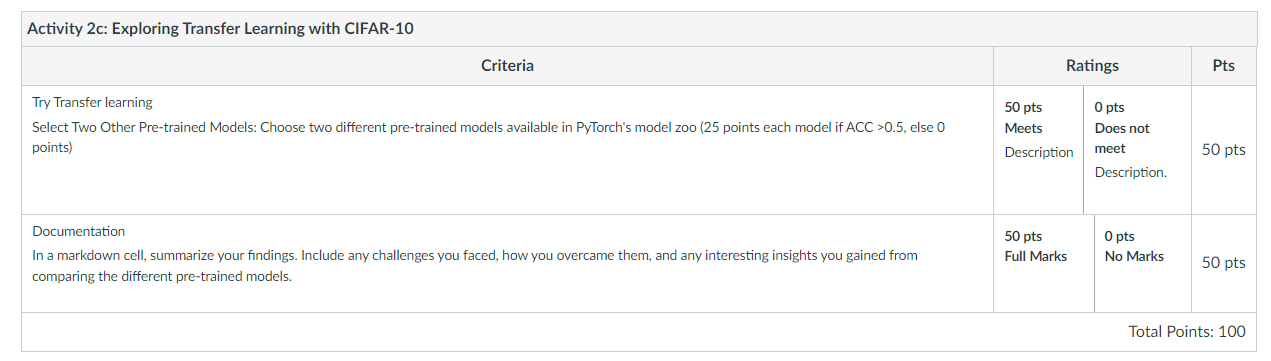

### Import libraries

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
from torchvision import models
import matplotlib.pyplot as plt

### **Get CIFAR10 Dataset**

### Connect to personal Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Define the path to store the CIFAR10 dataset

In [ ]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks'

In [ ]:
NUM_TRAIN = 45000
MINIBATCH_SIZE = 64

In [ ]:
transform_imagenet = T.Compose([
    T.Resize(224),
    T.ToTensor(),
    T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
])

In [ ]:
transform_cifar = T.Compose([
    T.ToTensor(),
    T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
])

### Split dataset into train, validation and test datasets

In [ ]:
# Training set loader
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_imagenet)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

# Validation set loader
cifar10_val = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                           transform=transform_imagenet)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, len(cifar10_val))))

# Testing set loader
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_imagenet)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
for i, (x, y) in enumerate(val_loader):
    print(i, x.shape, y.shape)

### Check device availability (CPU or CUDA)

In [ ]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print("Available device: " + device.type)

Available device: cpu


### **Display images**

In [ ]:
classes = ['Plane', 'Car', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

### Define "plot_figure" function

This function receives an image and displays it using Matplotlib

In [ ]:
def plot_figure(image):
    plt.imshow(image.permute(1,2,0))
    plt.axis('off')
    plt.show()

The image belongs to "Ship" category


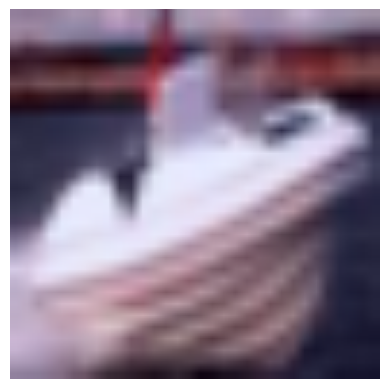

In [ ]:
# get a random id
rnd_sample_idx = np.random.randint(len(test_loader))
# print image label
print(f'The image belongs to "{classes[test_loader.dataset[rnd_sample_idx][1]]}" category')
# get image by index
image = test_loader.dataset[rnd_sample_idx][0]
# normalize image pixel values
image = (image - image.min()) / (image.max() -image.min() )
# call function to display image
plot_figure(image)

### Define "accuracy" function

This method calculates the accuracy of a given model, it compares the model's predictions with the actual labels

In [ ]:
# model: Neural network model to evaluate
# loader: dataset to be avaluated
def accuracy(model, loader):
  # Initializing counters
  num_correct = 0
  num_total = 0
  # set model to evaluation mode
  model.eval()
  # disable gradient calculation because this is not needed during evaluation
  with torch.no_grad():
      # loop through the batches in loader
      # x: images
      # y: labels
      for x, y in loader:
          # move x to specified device
          x = x.to(device)
          # move y to specified device
          y = y.to(device)
          # take predictions from model
          scores = model(x)
          # returns max score for each sample
          # and indices of predicted classes
          _, preds = scores.max(1)
          # number of correct predictions is added to num_correct
          num_correct += (preds == y).sum().item()
          # count total samples
          num_total += preds.size(0)
  # returns accuracy
  return num_correct/num_total

# Model 1: RestNet-18

In [ ]:
model_resnet18 = models.resnet18(pretrained=True)

C:\Users\nxf28864\Documents\GPS\Projects\Internal Repairs\IRC-AI\chat_venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\nxf28864\Documents\GPS\Projects\Internal Repairs\IRC-AI\chat_venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\nxf28864/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|█████████████████████████████████████████████████████████████████████████████| 44.7M/44.7M [00:33<00:00, 1.40MB/s]


#### Exploring the ResNet-18 model

In [ ]:
for i, w in enumerate(model_resnet18.parameters()):
    print(i, w.shape, w.requires_grad)

0 torch.Size([64, 3, 7, 7]) True
1 torch.Size([64]) True
2 torch.Size([64]) True
3 torch.Size([64, 64, 3, 3]) True
4 torch.Size([64]) True
5 torch.Size([64]) True
6 torch.Size([64, 64, 3, 3]) True
7 torch.Size([64]) True
8 torch.Size([64]) True
9 torch.Size([64, 64, 3, 3]) True
10 torch.Size([64]) True
11 torch.Size([64]) True
12 torch.Size([64, 64, 3, 3]) True
13 torch.Size([64]) True
14 torch.Size([64]) True
15 torch.Size([128, 64, 3, 3]) True
16 torch.Size([128]) True
17 torch.Size([128]) True
18 torch.Size([128, 128, 3, 3]) True
19 torch.Size([128]) True
20 torch.Size([128]) True
21 torch.Size([128, 64, 1, 1]) True
22 torch.Size([128]) True
23 torch.Size([128]) True
24 torch.Size([128, 128, 3, 3]) True
25 torch.Size([128]) True
26 torch.Size([128]) True
27 torch.Size([128, 128, 3, 3]) True
28 torch.Size([128]) True
29 torch.Size([128]) True
30 torch.Size([256, 128, 3, 3]) True
31 torch.Size([256]) True
32 torch.Size([256]) True
33 torch.Size([256, 256, 3, 3]) True
34 torch.Size([25

### Printing ResNet-18 layers

In [ ]:
model_resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### **Fine-tunning ResNet-18 model**

In [ ]:
model_aux = nn.Sequential(*list(model_resnet18.children()))
model_aux

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

### Removing the last layer

In [ ]:
model_aux = nn.Sequential(*list(model_resnet18.children())[:-1])

### Validating that the last layer was removed

In [ ]:
model_aux

### Setting the requires_grad parameter to False, this way it will not be necessary to retrain all the layers

In [ ]:
for i, parameter in enumerate(model_aux.parameters()):
    parameter.requires_grad = False

### Validating that requires_grad param was changed correclty

In [ ]:
for i, parameter in enumerate(model_aux.parameters()):
    print(i, parameter.requires_grad)

### Define "training" function

In [ ]:
def train(model, optimizer, epochs=100):
    model = model.to(device=device)
    for epoch in range(epochs):
        for i, (xi, yi) in enumerate(train_loader):
            model.train()
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)
            scores = model(xi)

            cost = F.cross_entropy(input= scores, target=yi)

            optimizer.zero_grad()
            cost.backward()
            optimizer.step()

        acc = accuracy(model, val_loader)
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},')

In [ ]:
hidden1 = 256
hidden = 256
lr = 5e-4
epochs = 3

In [ ]:
model1 = nn.Sequential(model_aux,
                       nn.Flatten(),
                       nn.Linear(in_features=512, out_features= 10, bias= True))
optimizer = torch.optim.Adam(model1.parameters(), lr=lr, betas=(0.9, 0.999))

In [ ]:
model1

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

### Training ResNet-18

In [ ]:
train(model1, optimizer, epochs)

Epoch: 0, costo: 1.4059102535247803, accuracy: 0.7704,
Epoch: 1, costo: 0.7097942233085632, accuracy: 0.7934,
Epoch: 2, costo: 1.0365110635757446, accuracy: 0.7976,


### **ResNet-18 model's Accuracy**

In [ ]:
accuracy(model1, test_loader)

0.7957

# Model 2: AlexNet Model

AlexNet is deep neural network that won the ImageNet competition in 2012, we first heard about it during a class with Dr. Pepe Cantoral.

It consists of 8 layers, 5 of which are convolutional, followed by 3 fully connected layers. It uses ReLU activations.

In [ ]:
model_alexnet = models.alexnet(pretrained=True)

C:\Users\nxf28864\Documents\GPS\Projects\Internal Repairs\IRC-AI\chat_venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to C:\Users\nxf28864/.cache\torch\hub\checkpoints\alexnet-owt-7be5be79.pth
100%|███████████████████████████████████████████████████████████████████████████████| 233M/233M [02:54<00:00, 1.40MB/s]


In [ ]:
model_aux_alexnet = nn.Sequential(*list(model_alexnet.children())[:-1])

In [ ]:
for param in model_aux_alexnet.parameters():
    param.requires_grad = False

In [ ]:
model_alexnet_final = nn.Sequential(
    model_aux_alexnet,
    nn.Flatten(),
    nn.Linear(256 * 6 * 6, 10)
)

In [ ]:
optimizer_alexnet = torch.optim.Adam(model_alexnet_final.parameters(), lr=lr)

In [ ]:
train(model_alexnet_final, optimizer_alexnet, epochs)

Epoch: 0, costo: 0.1819111704826355, accuracy: 0.8192,
Epoch: 1, costo: 0.2775037884712219, accuracy: 0.83,
Epoch: 2, costo: 0.20353856682777405, accuracy: 0.8306,


### **AlexNet Model's Accuracy**

In [ ]:
accuracy(model_alexnet_final, test_loader)

0.8272

# Model 3: MobileNetV2

In [ ]:
model_mobilenetv2 = models.mobilenet_v2(pretrained=True)

In [ ]:
model_aux_mobilenetv2 = nn.Sequential(*list(model_mobilenetv2.children())[:-1])

In [ ]:
for param in model_aux_mobilenetv2.parameters():
    param.requires_grad = False

In [ ]:
model_mobilenetv2_final = nn.Sequential(
    model_aux_mobilenetv2,
    nn.AdaptiveAvgPool2d((1, 1)),
    nn.Flatten(),
    nn.Linear(1280, 10)
)

In [ ]:
optimizer_mobilenetv2 = torch.optim.Adam(model_mobilenetv2_final.parameters(), lr=0.001)

In [ ]:
train(model_mobilenetv2_final, optimizer_mobilenetv2, epochs)

Epoch: 0, costo: 1.1635485887527466, accuracy: 0.7544,
Epoch: 1, costo: 1.128833293914795, accuracy: 0.782,
Epoch: 2, costo: 1.3715790510177612, accuracy: 0.784,


In [ ]:
mobileNetV2Acc = accuracy(model_mobilenetv2_final, test_loader)

### **MobileNetV2 model's Accuracy**

In [ ]:
print(f'MobileNetV2 Accuracy: {mobileNetV2Acc}')

MobileNetV2 Accuracy: 0.7791


### **Conclussions**

Using pretrained models and transfer learning is highly benefitial because it allowed us to improve the accuracy of the models using CIFAR10 dataset. The models are loaded with weights pretrained, those weights help the model know general image features such edges, textures and patterns.

In general, to adapt the model to the CIFAR10 dataset, speed up training and focus on task-specific features, we freeze the weights of all the layers and replace the last layer with a new layer suitable for CIFAR10's 10 classes. We used nn.Sequential to include first the pretrained model, then nn.Flatten to flat the output before passing it to the output layer. In some cases is necessary to add an adaptative pooling layer, and finally each pretrained model returns an specific ouput, that output channels is going to be the input of the last custom layer.  

The models used in this excercise are:

* ResNet-18: this model was designed to address the vanishing gradient problem in training deep neural networks. It uses skip connections to allow gradientes to flow through the network more easily enabling deeper architectures. This version of the model has 18 layers.
* MobileNetV2: is a light-weight CNN designed for mobile and embedded devices it uses depthwise separable convolutions (filters all channels of an image at once)
* AlexNet: This model is one of the pioneer deep learning models. It has eight layers (5 convolutional, 3 fully connected) and uses ReLU activations.


We choose AlexNet and MobileNetV2 becuase its performance, on Google Collab, we couldn't complete one epoch in less than an hour. We decided to use a local version of Jupyter Notebook running on a local computer with a core i7 processor and 32gb of ram where models' training took around 1 hour each one. We also tried model VGG16 but since it didn't complete one epoch in one and a half hour we decided not to include it in this notebook.

We found that after only 3 epochs the models in this excercise 2c performed better than our best results in excersice 2b.

The **final accuracy** achieved on the test set per model was:
* ResNet-18: 0.7957
* AlexNet: 0.8272
* MobileNetV2: 0.7791

